# YOLO Training Configuration Parameters

This document explains the additional parameters used in the YOLO training process. These parameters allow for customization and optimization of the training pipeline.

## Parameters Explanation

### `batch=16`
- **Description**: Sets the batch size for training.
- **Impact**: Higher values may improve training speed but require more GPU memory.

### `device=0`
- **Description**: Specifies the GPU ID to use for training.
- **Options**: 
  - Use `0`, `1`, etc., for specific GPU IDs.
  - Use `'cpu'` if no GPU is available.

### `lr0=0.01`
- **Description**: Sets the initial learning rate for the optimizer.
- **Impact**: Affects how quickly the model weights are updated during training.

### `optimizer='Adam'`
- **Description**: Chooses the optimizer for training.
- **Options**:
  - `'Adam'` for Adam optimizer.
  - `'SGD'` for Stochastic Gradient Descent.

### `workers=8`
- **Description**: Specifies the number of worker threads for data loading.
- **Impact**: Higher values can improve data loading speeds but may require more system resources.

### `seed=42`
- **Description**: Ensures reproducibility by setting a random seed.
- **Impact**: Makes training results consistent across different runs.

### `patience=10`
- **Description**: Implements early stopping if validation metrics do not improve for the specified number of epochs.
- **Impact**: Prevents overfitting and saves training time.

### `weight_decay=0.0005`
- **Description**: Applies weight decay for regularization.
- **Impact**: Reduces overfitting by penalizing large weights.

### `momentum=0.937`
- **Description**: Momentum parameter for optimizers like SGD.
- **Impact**: Helps accelerate gradients vectors in the right direction, leading to faster convergence.

### `name='exp_name'`
- **Description**: Names the experiment and creates a folder in the `runs/train` directory.
- **Impact**: Helps organize and identify training experiments.

### `verbose=True`
- **Description**: Outputs detailed logs during training.
- **Impact**: Provides more visibility into the training process.

---

## Example Usage

```python
results = model.train(
    data="data.yaml",   # Path to dataset YAML file
    epochs=100,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=16,           # Batch size
    device=0,           # GPU ID or 'cpu'
    lr0=0.01,           # Initial learning rate
    optimizer="Adam",   # Optimizer type
    workers=8,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience
    weight_decay=0.0005,  # Weight decay
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Experiment name
    verbose=True        # Detailed logs
)


https://universe.roboflow.com/workenv-dayet/facial-emotion-dataset-7g1jd-hipbk

**Step 01 # Install the Ultralytics Package**

In [1]:

import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install ultralytics
!pip install roboflow

# Clean up the notebook
clean_notebook()




Notebook cleaned.


**Step 02 # Import All the Requried Libraries**

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.70 🚀 Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
Setup complete ✅ (64 CPUs, 70.6 GB RAM, 18.5/207.0 GB disk)


**Step # 03 Download Dataset from Roboflow**

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Facial-Emotion-Dataset--3 in yolov11:: 100%|██████████| 2466/2466 [00:00<00:00, 6863.26it/s]


In [4]:
dataset.location

'/workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3'

In [5]:

from ultralytics import YOLO
from IPython.display import Image

# Load the YOLO model
model = YOLO("yolo11n.pt")  # Load your model architecture or pre-trained weights

# Train the model with the specified configuration
results = model.train(
    data=f"{dataset.location}/data.yaml",  # Path to dataset YAML file
    epochs=50,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=60,           # Batch size
    device=0,           # Specify GPU (0) or CPU ('cpu')
    lr0=0.001,           # Initial learning rate
    optimizer="Adam",   # Optimizer (e.g., 'SGD', 'Adam')
    workers=30,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience (number of epochs)
    weight_decay=0.0005,  # Weight decay for regularization
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Name of the experiment folder
    verbose=True        # Print detailed training logs
)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/data.yaml, epochs=50, time=None, patience=10, batch=60, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=30, project=None, name=exp_name, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

train: Scanning /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/train/labels.cache... 943 images, 0 backgrounds, 0 corrupt: 100%|██████████| 943/943 [00:00<?, ?it/s]
val: Scanning /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/exp_name/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 30 dataloader workers
Logging results to runs/detect/exp_name
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.23G      1.281      3.287      1.485        288        640: 100%|██████████| 16/16 [00:03<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all        185        862    0.00402      0.364     0.0447      0.025



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.8G     0.8651      2.409      1.167        366        640: 100%|██████████| 16/16 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]


                   all        185        862    0.00517      0.393     0.0593     0.0285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.67G     0.8212      2.088      1.126        246        640: 100%|██████████| 16/16 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]


                   all        185        862     0.0202      0.981      0.219      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.59G     0.8786        1.9       1.13        261        640: 100%|██████████| 16/16 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]


                   all        185        862      0.318      0.567      0.236      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.81G      0.861      1.746      1.111        258        640: 100%|██████████| 16/16 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]


                   all        185        862      0.118      0.223      0.163      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.59G     0.8558      1.652      1.097        283        640: 100%|██████████| 16/16 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all        185        862      0.258      0.456      0.305      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.75G     0.8268      1.576      1.096        197        640: 100%|██████████| 16/16 [00:02<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all        185        862      0.152      0.408      0.222      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.73G     0.8328       1.51      1.094        257        640: 100%|██████████| 16/16 [00:02<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all        185        862      0.249      0.511      0.344       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.98G     0.8187      1.448      1.089        287        640: 100%|██████████| 16/16 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all        185        862       0.24      0.607      0.385       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      9.06G     0.8009      1.419      1.084        312        640: 100%|██████████| 16/16 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all        185        862      0.306      0.775      0.439      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      9.17G     0.7739      1.372      1.079        286        640: 100%|██████████| 16/16 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all        185        862      0.305      0.576      0.405      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.68G     0.7754      1.349      1.078        276        640: 100%|██████████| 16/16 [00:02<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all        185        862      0.384      0.686      0.488      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.72G     0.7764      1.322      1.072        271        640: 100%|██████████| 16/16 [00:02<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all        185        862      0.316      0.663      0.445      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.62G     0.7554      1.283      1.063        291        640: 100%|██████████| 16/16 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all        185        862      0.285      0.711      0.406      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.78G     0.7578      1.275      1.072        281        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all        185        862      0.412      0.681      0.535      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.92G     0.7606      1.242      1.074        280        640: 100%|██████████| 16/16 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all        185        862      0.386      0.632      0.489      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.82G     0.7604      1.237      1.068        282        640: 100%|██████████| 16/16 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all        185        862      0.473      0.613      0.546      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.84G     0.7444      1.217      1.071        236        640: 100%|██████████| 16/16 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all        185        862      0.366      0.669      0.528      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.99G     0.7628      1.217      1.075        327        640: 100%|██████████| 16/16 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all        185        862      0.431      0.643      0.577      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.76G     0.7468      1.193      1.068        240        640: 100%|██████████| 16/16 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all        185        862      0.436      0.598      0.565      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.76G     0.7431      1.196      1.063        246        640: 100%|██████████| 16/16 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all        185        862      0.404      0.703      0.545      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.62G     0.7274      1.178      1.059        257        640: 100%|██████████| 16/16 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all        185        862      0.502      0.665      0.569      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.56G     0.7151      1.146      1.053        294        640: 100%|██████████| 16/16 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all        185        862      0.446      0.763      0.617       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.82G     0.7483      1.143      1.066        258        640: 100%|██████████| 16/16 [00:02<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all        185        862       0.51      0.702      0.611      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.71G     0.7086      1.123      1.059        247        640: 100%|██████████| 16/16 [00:02<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all        185        862      0.555      0.704      0.655      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.61G     0.7044      1.122      1.061        254        640: 100%|██████████| 16/16 [00:02<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all        185        862      0.556      0.743      0.632      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.84G     0.7075      1.092      1.054        330        640: 100%|██████████| 16/16 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all        185        862      0.503      0.652       0.62      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.78G     0.7017      1.102      1.049        280        640: 100%|██████████| 16/16 [00:02<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all        185        862      0.556      0.654       0.62      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.99G     0.7012      1.068      1.049        190        640: 100%|██████████| 16/16 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all        185        862      0.473      0.564       0.54      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.88G     0.6837      1.069      1.044        231        640: 100%|██████████| 16/16 [00:02<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all        185        862       0.55       0.64       0.62      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.89G     0.7099      1.066      1.052        337        640: 100%|██████████| 16/16 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all        185        862       0.55      0.701      0.663      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.75G     0.6926      1.056      1.038        333        640: 100%|██████████| 16/16 [00:02<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all        185        862      0.584      0.698      0.677      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.81G     0.6968      1.039      1.043        282        640: 100%|██████████| 16/16 [00:02<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all        185        862      0.539      0.684       0.65      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.93G     0.6746      1.005       1.04        262        640: 100%|██████████| 16/16 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all        185        862      0.597      0.658      0.679      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.88G     0.6708      1.014      1.039        346        640: 100%|██████████| 16/16 [00:02<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all        185        862      0.574      0.711      0.678      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.72G     0.6656     0.9995      1.041        261        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all        185        862      0.591      0.684      0.665      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.86G     0.6814     0.9839       1.04        248        640: 100%|██████████| 16/16 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all        185        862      0.541      0.701      0.665      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.89G     0.6722     0.9817      1.034        248        640: 100%|██████████| 16/16 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all        185        862      0.589      0.739      0.699      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.81G     0.6685     0.9909      1.036        238        640: 100%|██████████| 16/16 [00:02<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all        185        862      0.646      0.687      0.711      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.91G     0.6605     0.9601      1.027        284        640: 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all        185        862       0.62      0.647      0.677      0.567


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.71G     0.7526     0.9582      1.065        102        640: 100%|██████████| 16/16 [00:10<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all        185        862      0.602      0.745      0.703      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.71G     0.7361     0.8893      1.043         58        640: 100%|██████████| 16/16 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all        185        862      0.567      0.756      0.695      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.32G     0.7057     0.8581      1.016        194        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all        185        862      0.639      0.708      0.705      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.32G     0.6906     0.8348      1.017        141        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all        185        862      0.634      0.723      0.707      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.32G     0.6938     0.8063      1.009        163        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all        185        862      0.667        0.7      0.722      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.32G     0.6848      0.791      1.008        161        640: 100%|██████████| 16/16 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all        185        862      0.635      0.729      0.716      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.32G     0.6939     0.7922      1.011        172        640: 100%|██████████| 16/16 [00:02<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all        185        862       0.65      0.711      0.713      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.31G     0.6937     0.7703      1.014         84        640: 100%|██████████| 16/16 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all        185        862      0.665        0.7      0.727      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.32G     0.6769     0.7602      1.006        114        640: 100%|██████████| 16/16 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all        185        862      0.664      0.724      0.731      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.32G     0.6762     0.7374     0.9911        132        640: 100%|██████████| 16/16 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all        185        862      0.652      0.725      0.735      0.622



50 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/exp_name/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/exp_name/weights/best.pt, 5.5MB

Validating runs/detect/exp_name/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


                   all        185        862      0.651      0.726      0.735      0.622
                 angry         76        176      0.531      0.585      0.612      0.456
               disgust         18         18       0.72      0.944      0.907      0.894
                  fear         51        128      0.668      0.617       0.68      0.531
                 happy         64        180      0.717      0.789      0.823      0.626
               neutral         52        184      0.502      0.702      0.601      0.454
                   sad         64        144      0.499      0.535      0.567      0.454
              surprise         32         32      0.919      0.906      0.958      0.939
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/exp_name


**Step # 04 Examine Training Results**

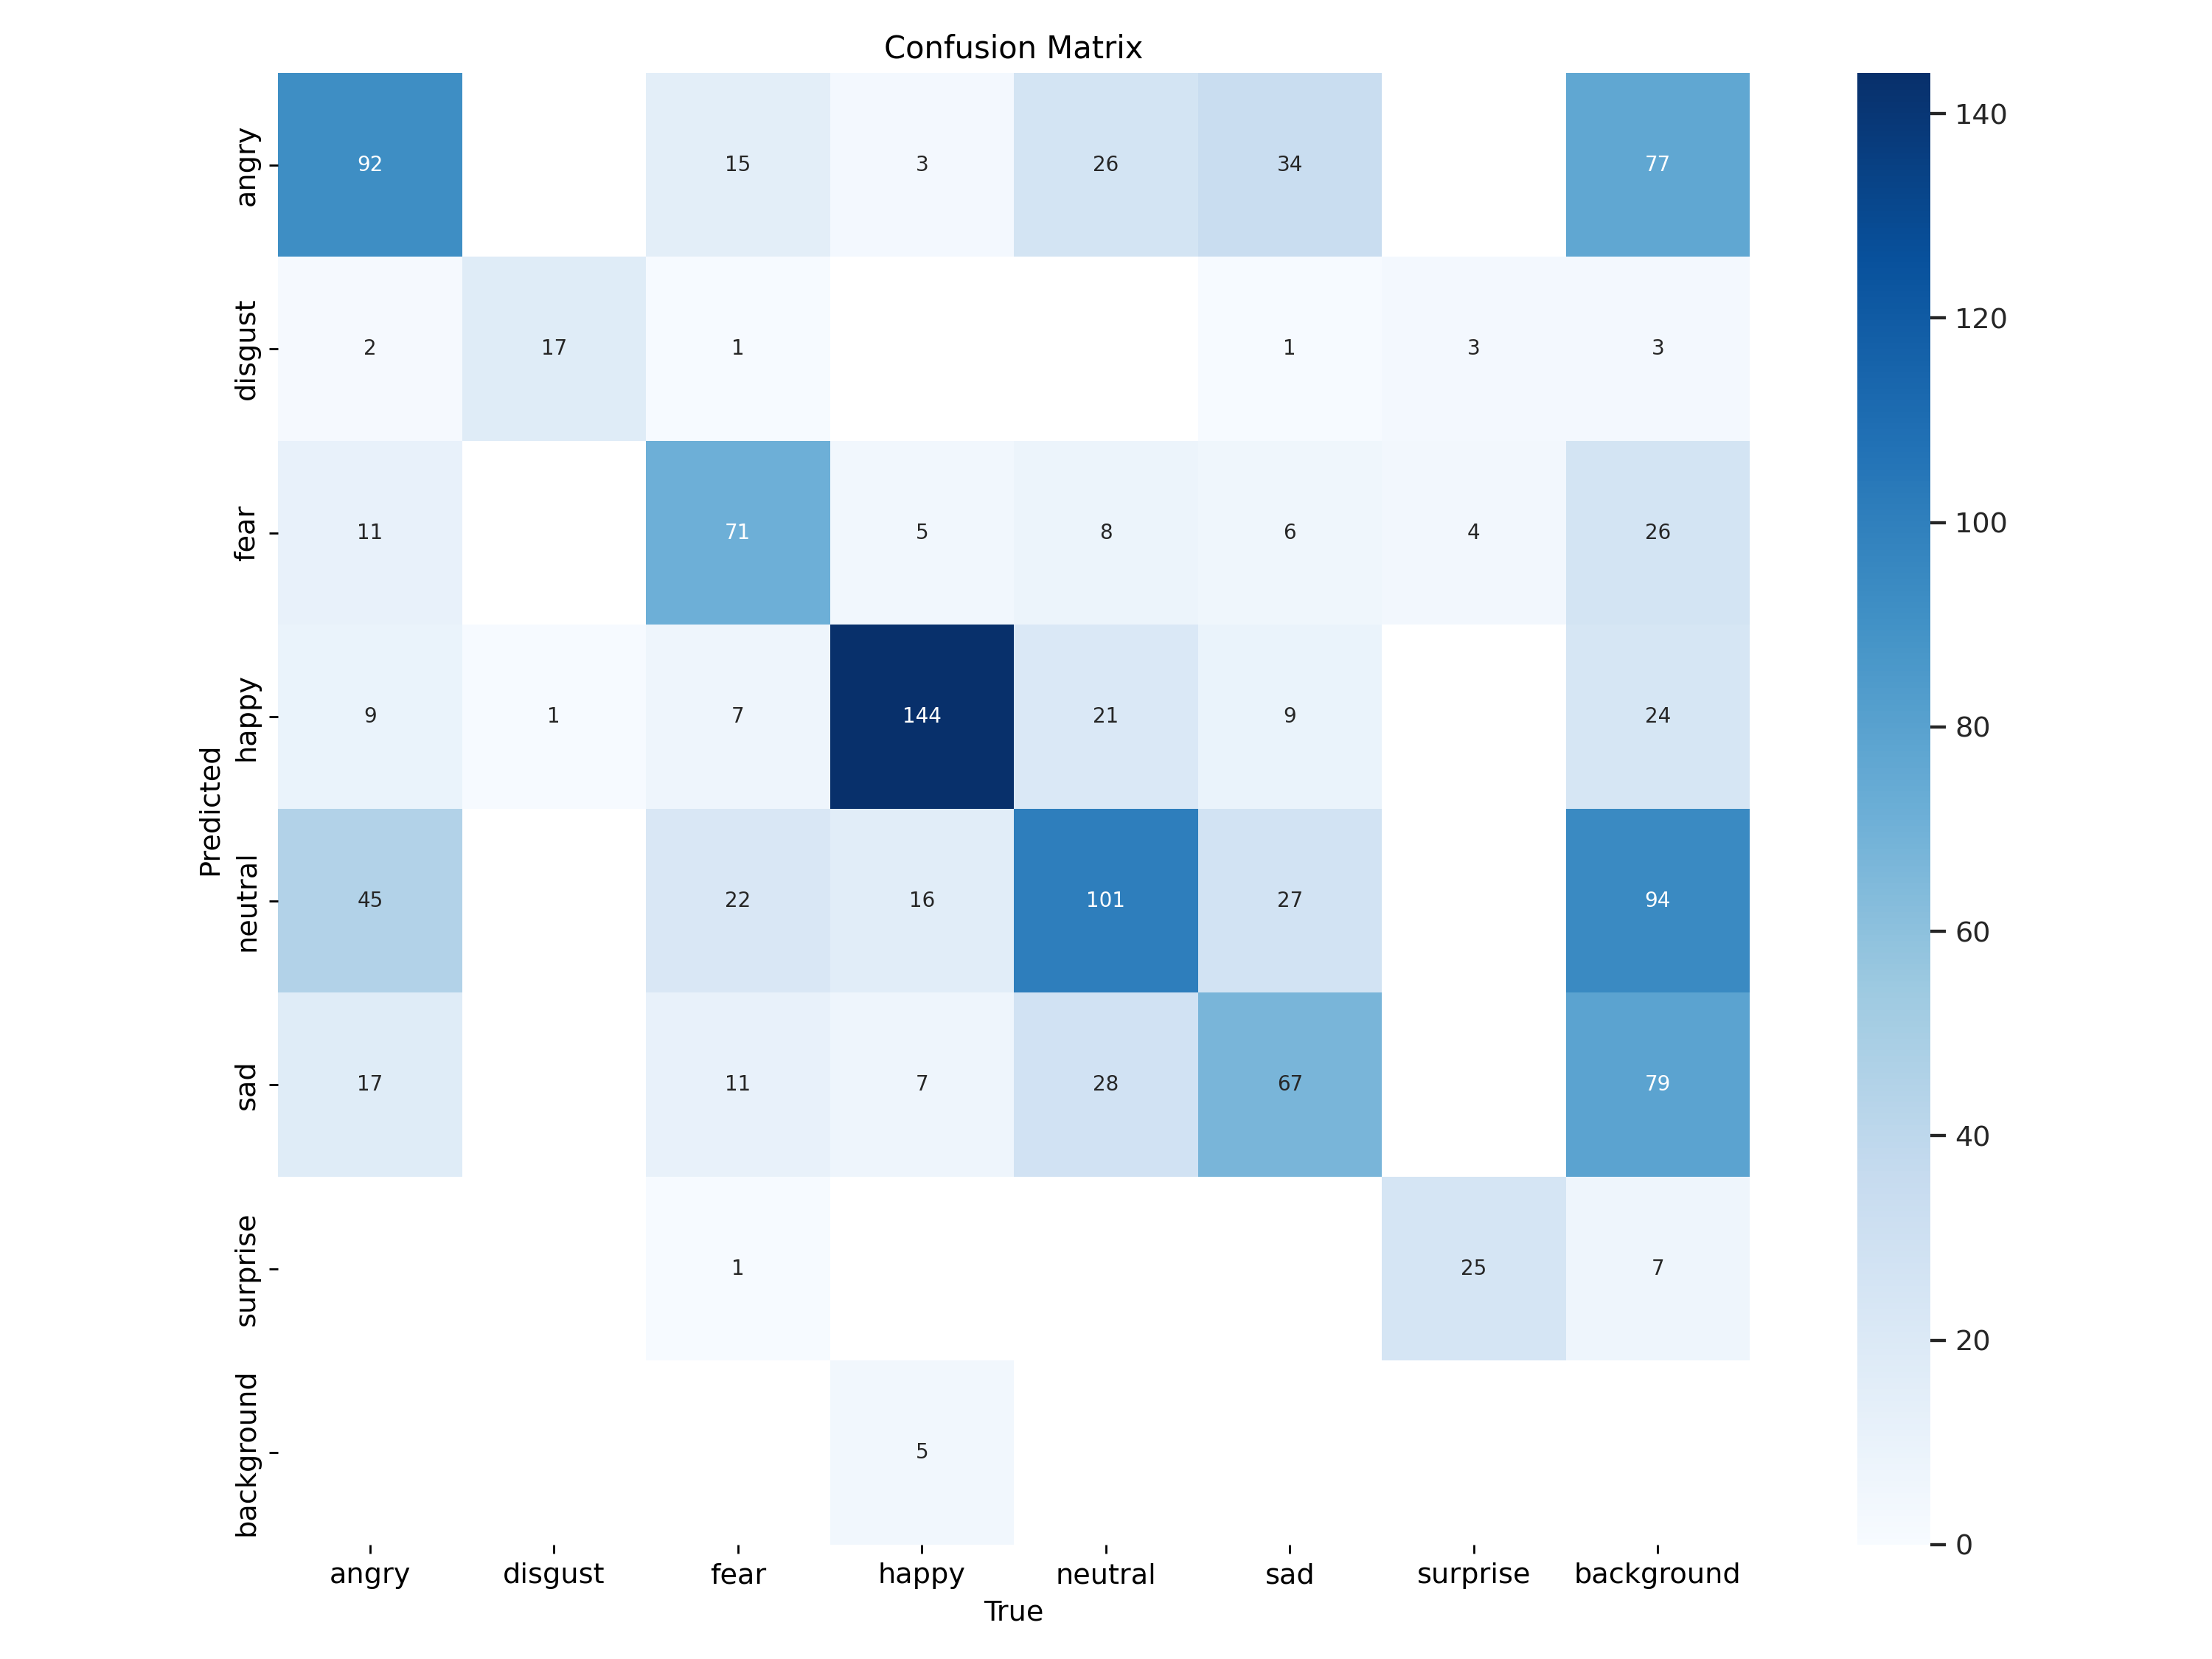

In [6]:
Image("./runs/detect/exp_name/confusion_matrix.png", width=800)

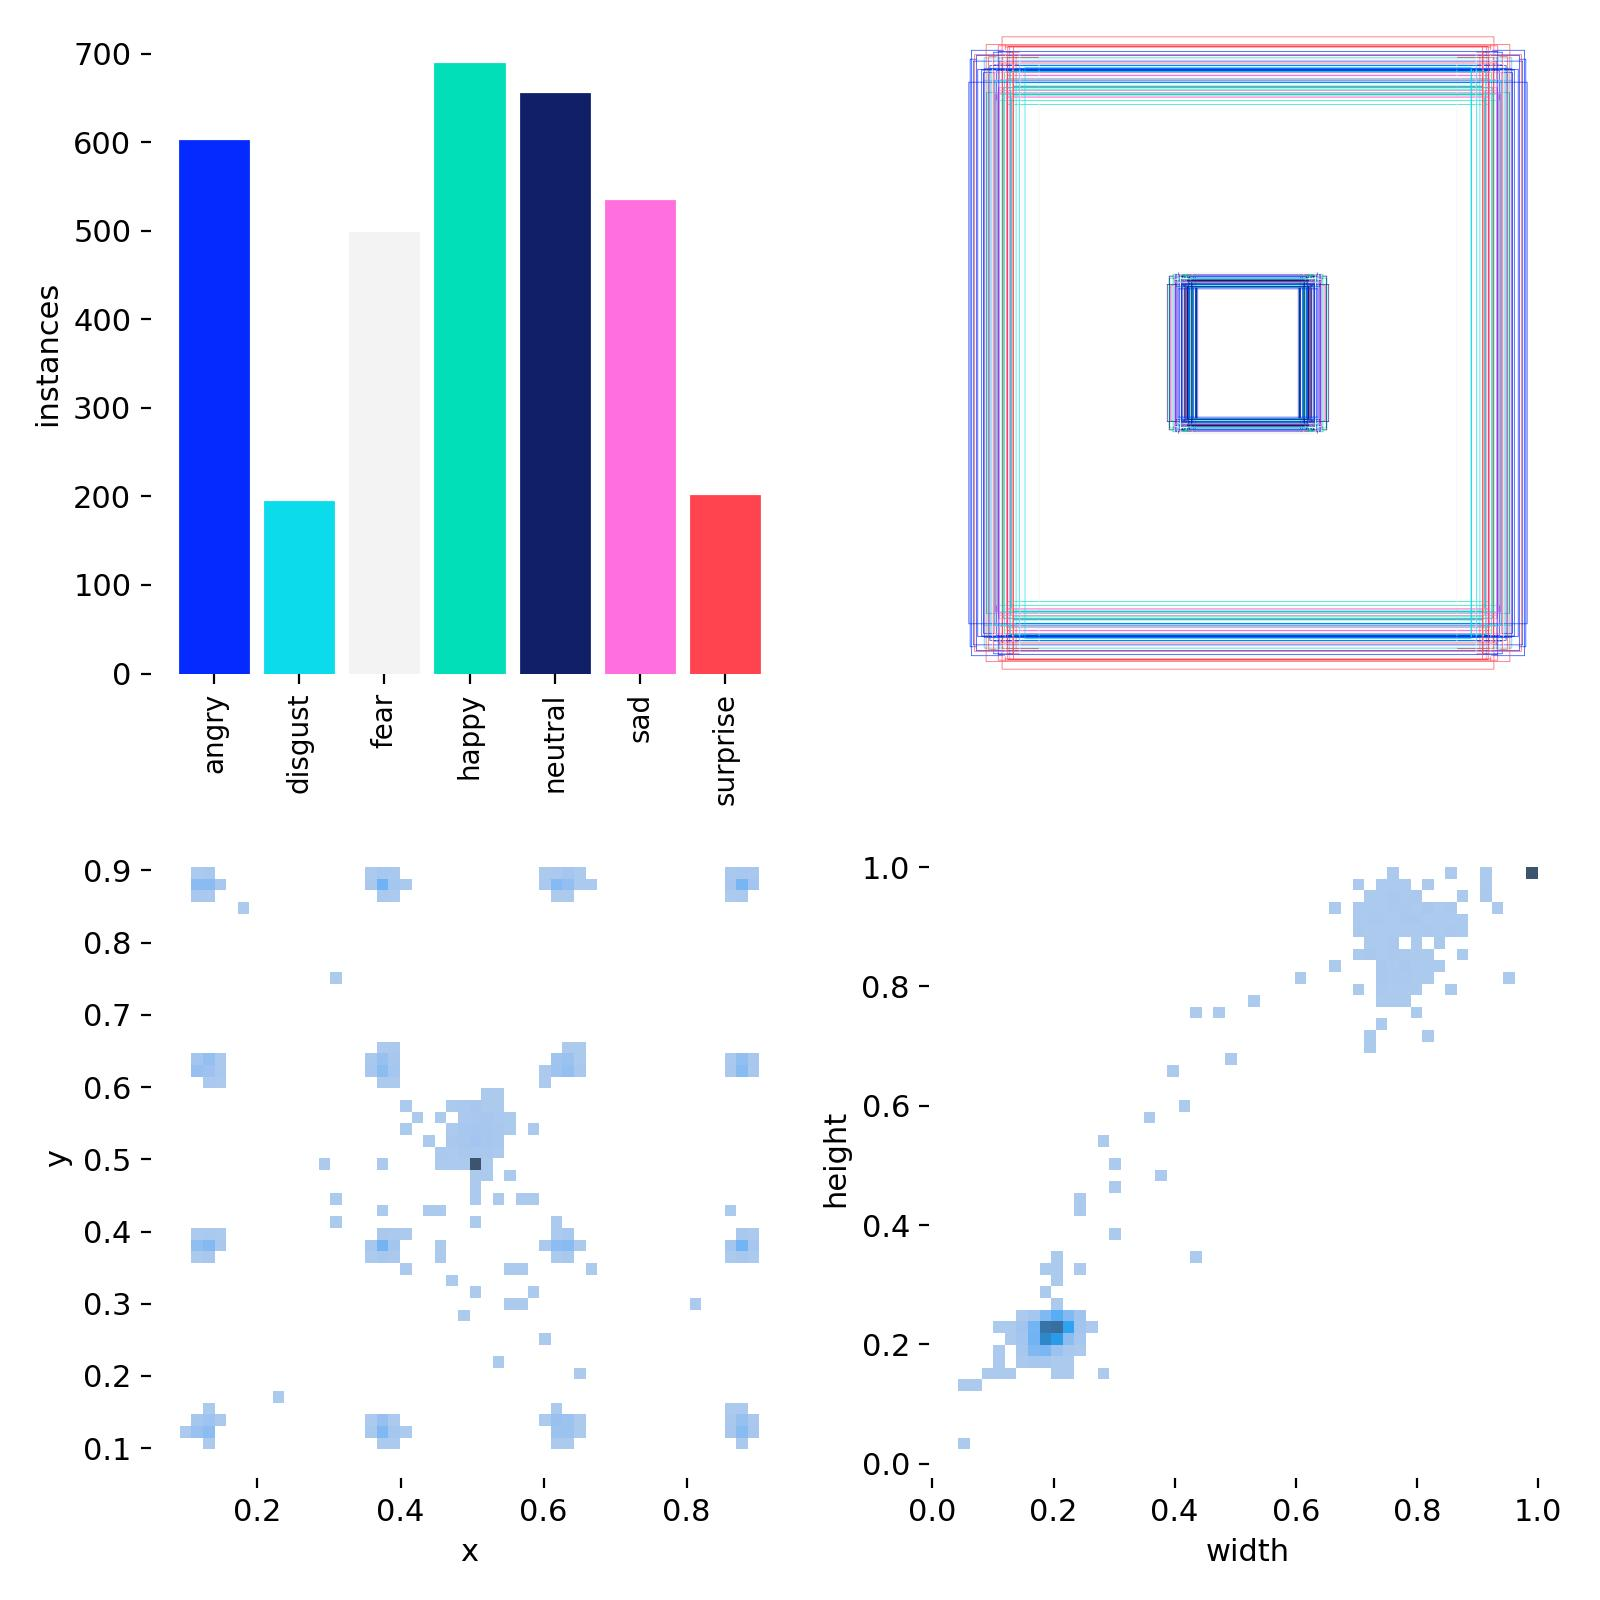

In [7]:
Image("./runs/detect/exp_name/labels.jpg", width=800)

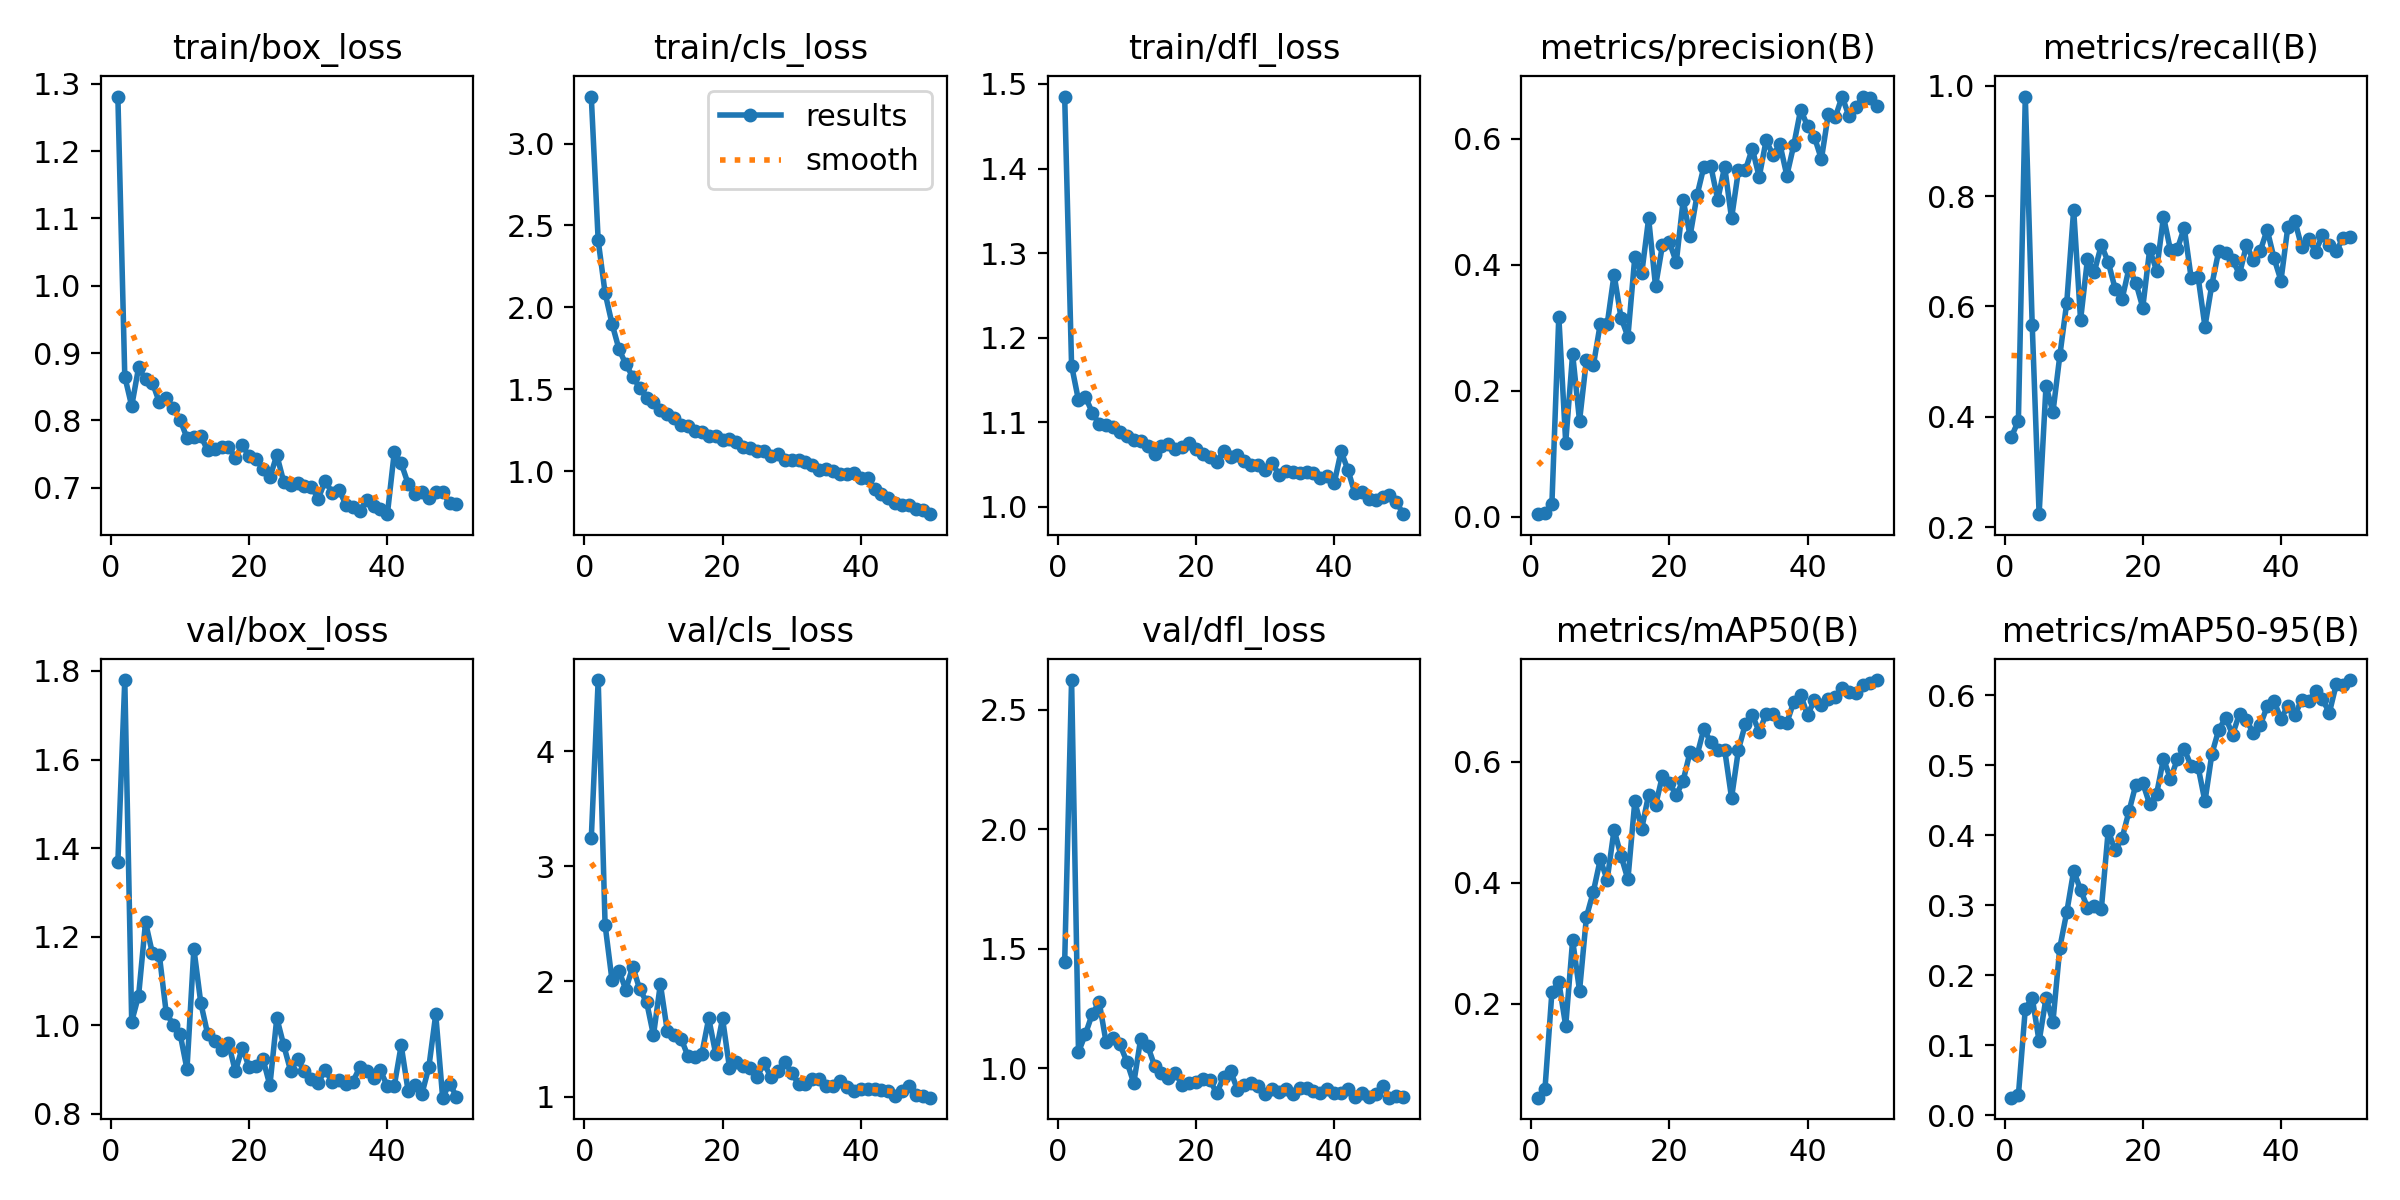

In [8]:
Image("./runs/detect/exp_name/results.png", width=600)

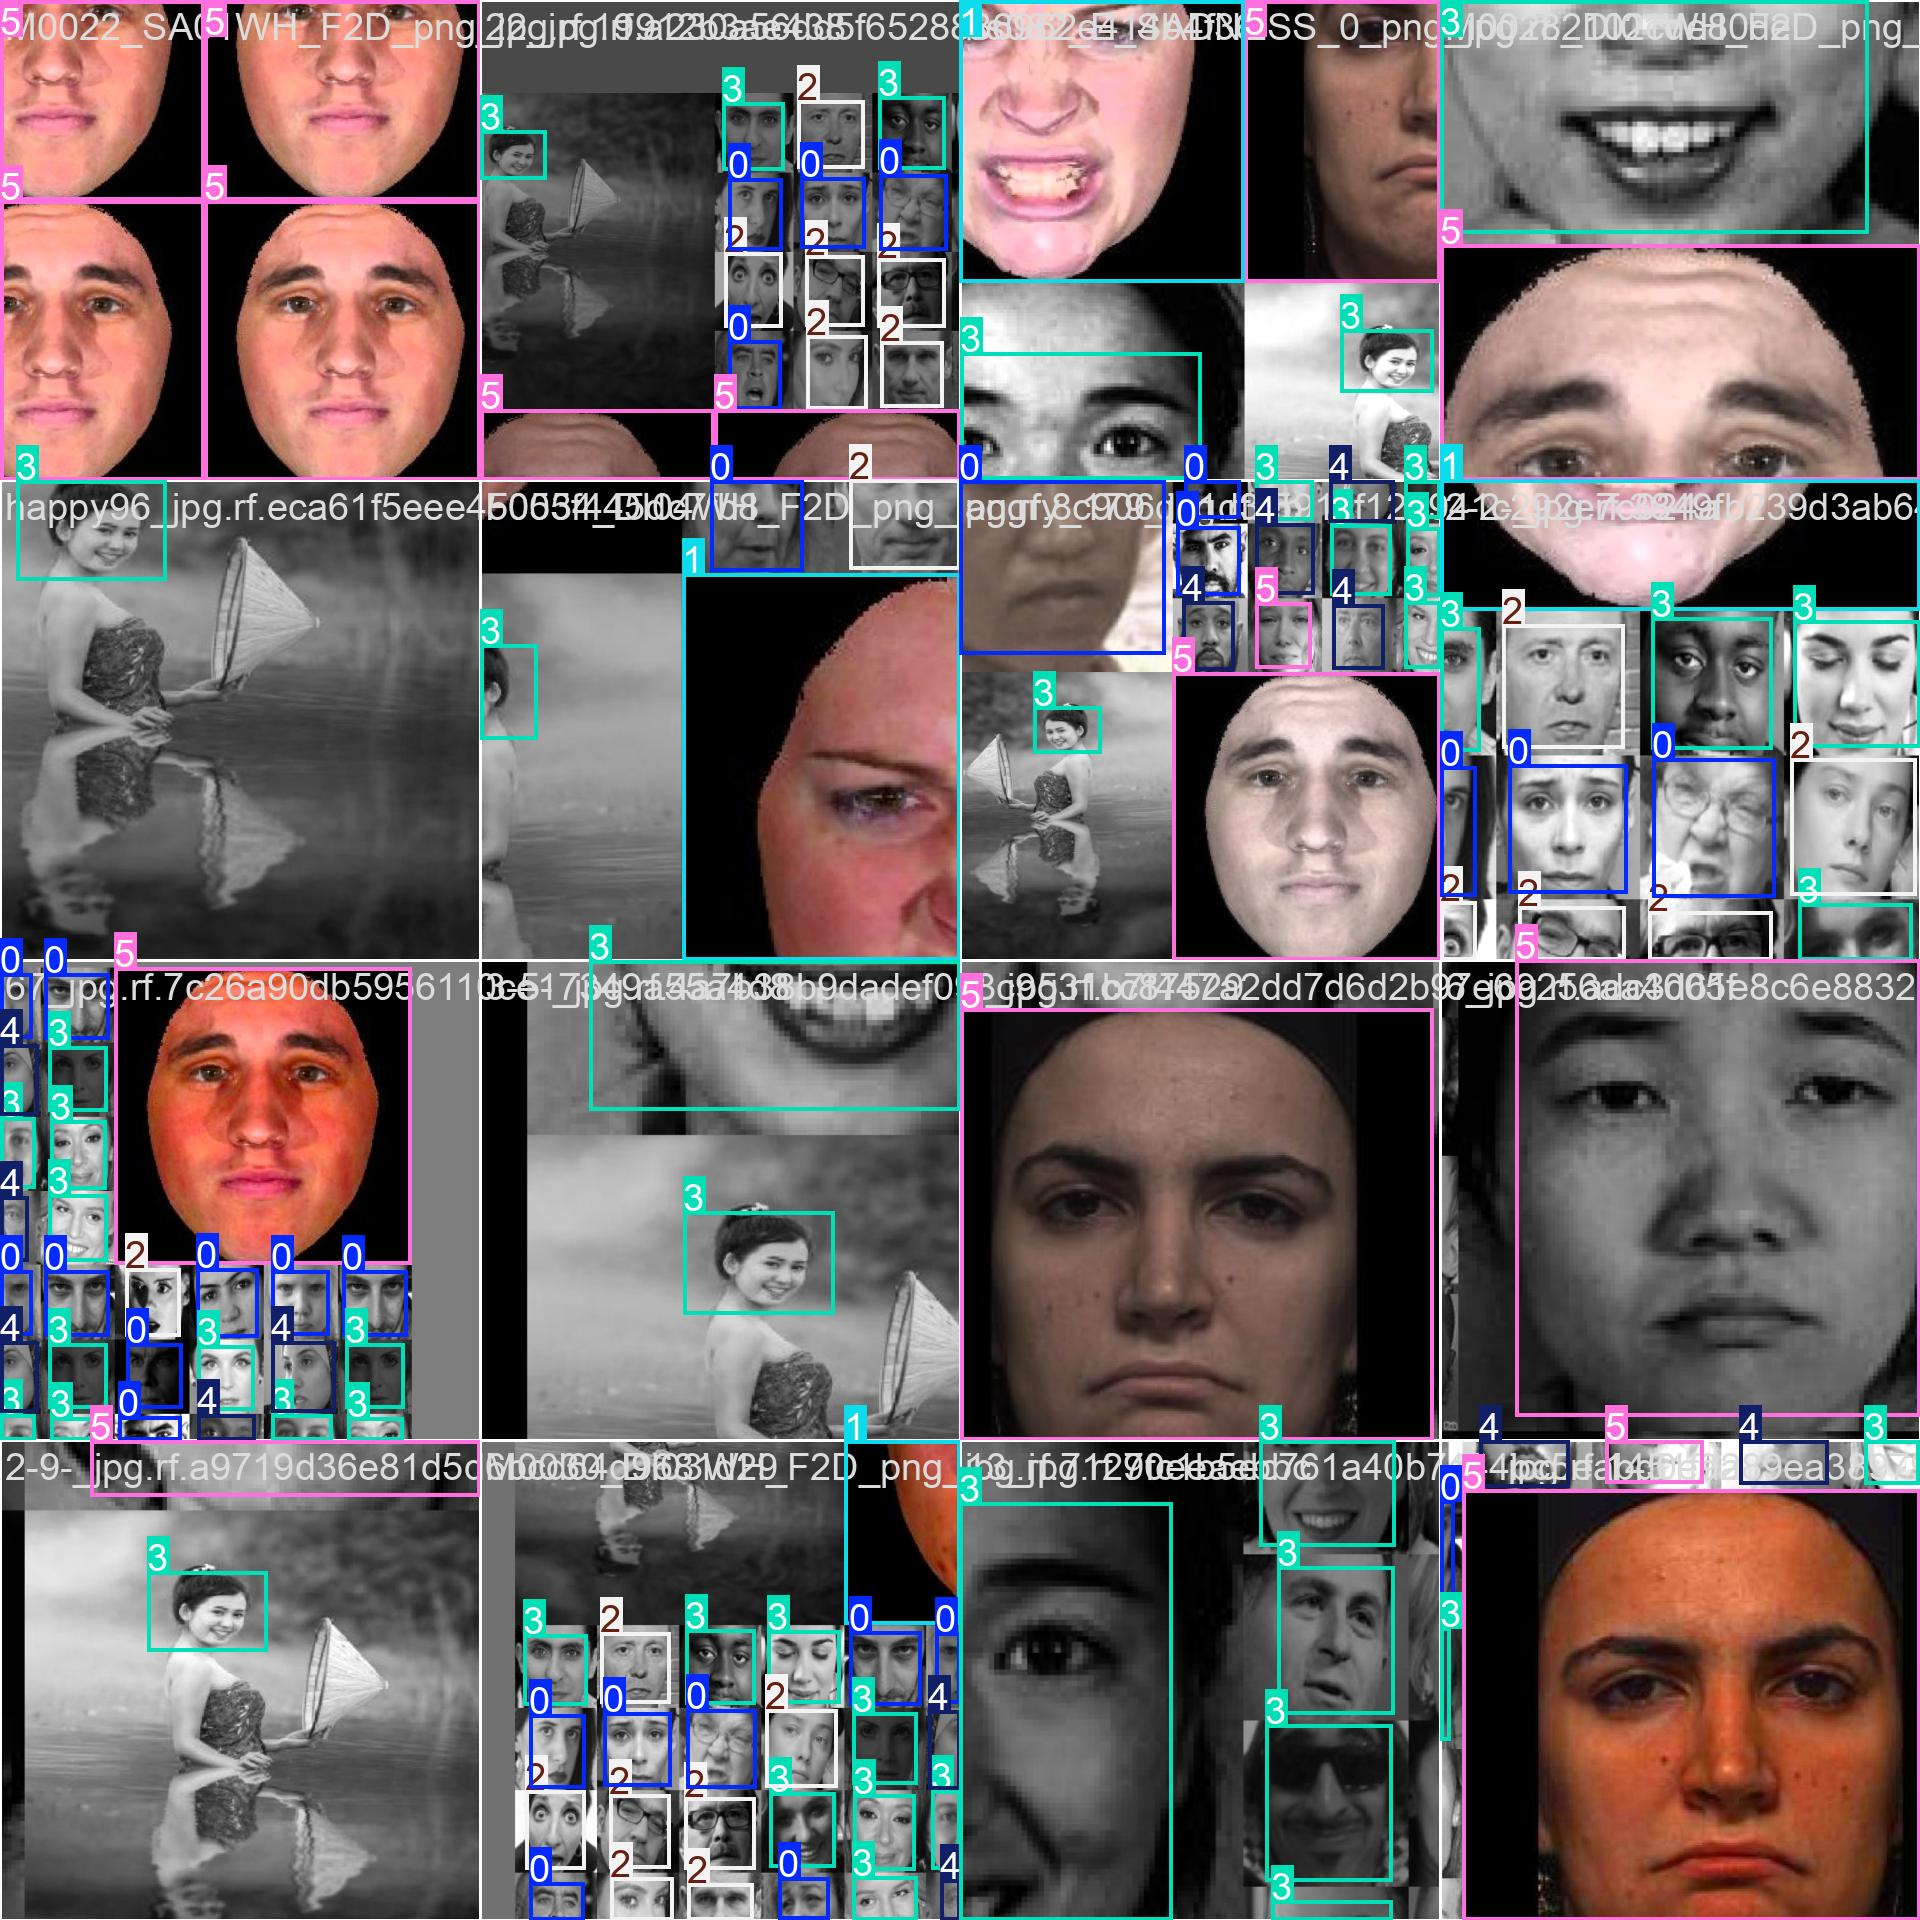

In [9]:
Image("./runs/detect/exp_name/train_batch0.jpg", width=600)

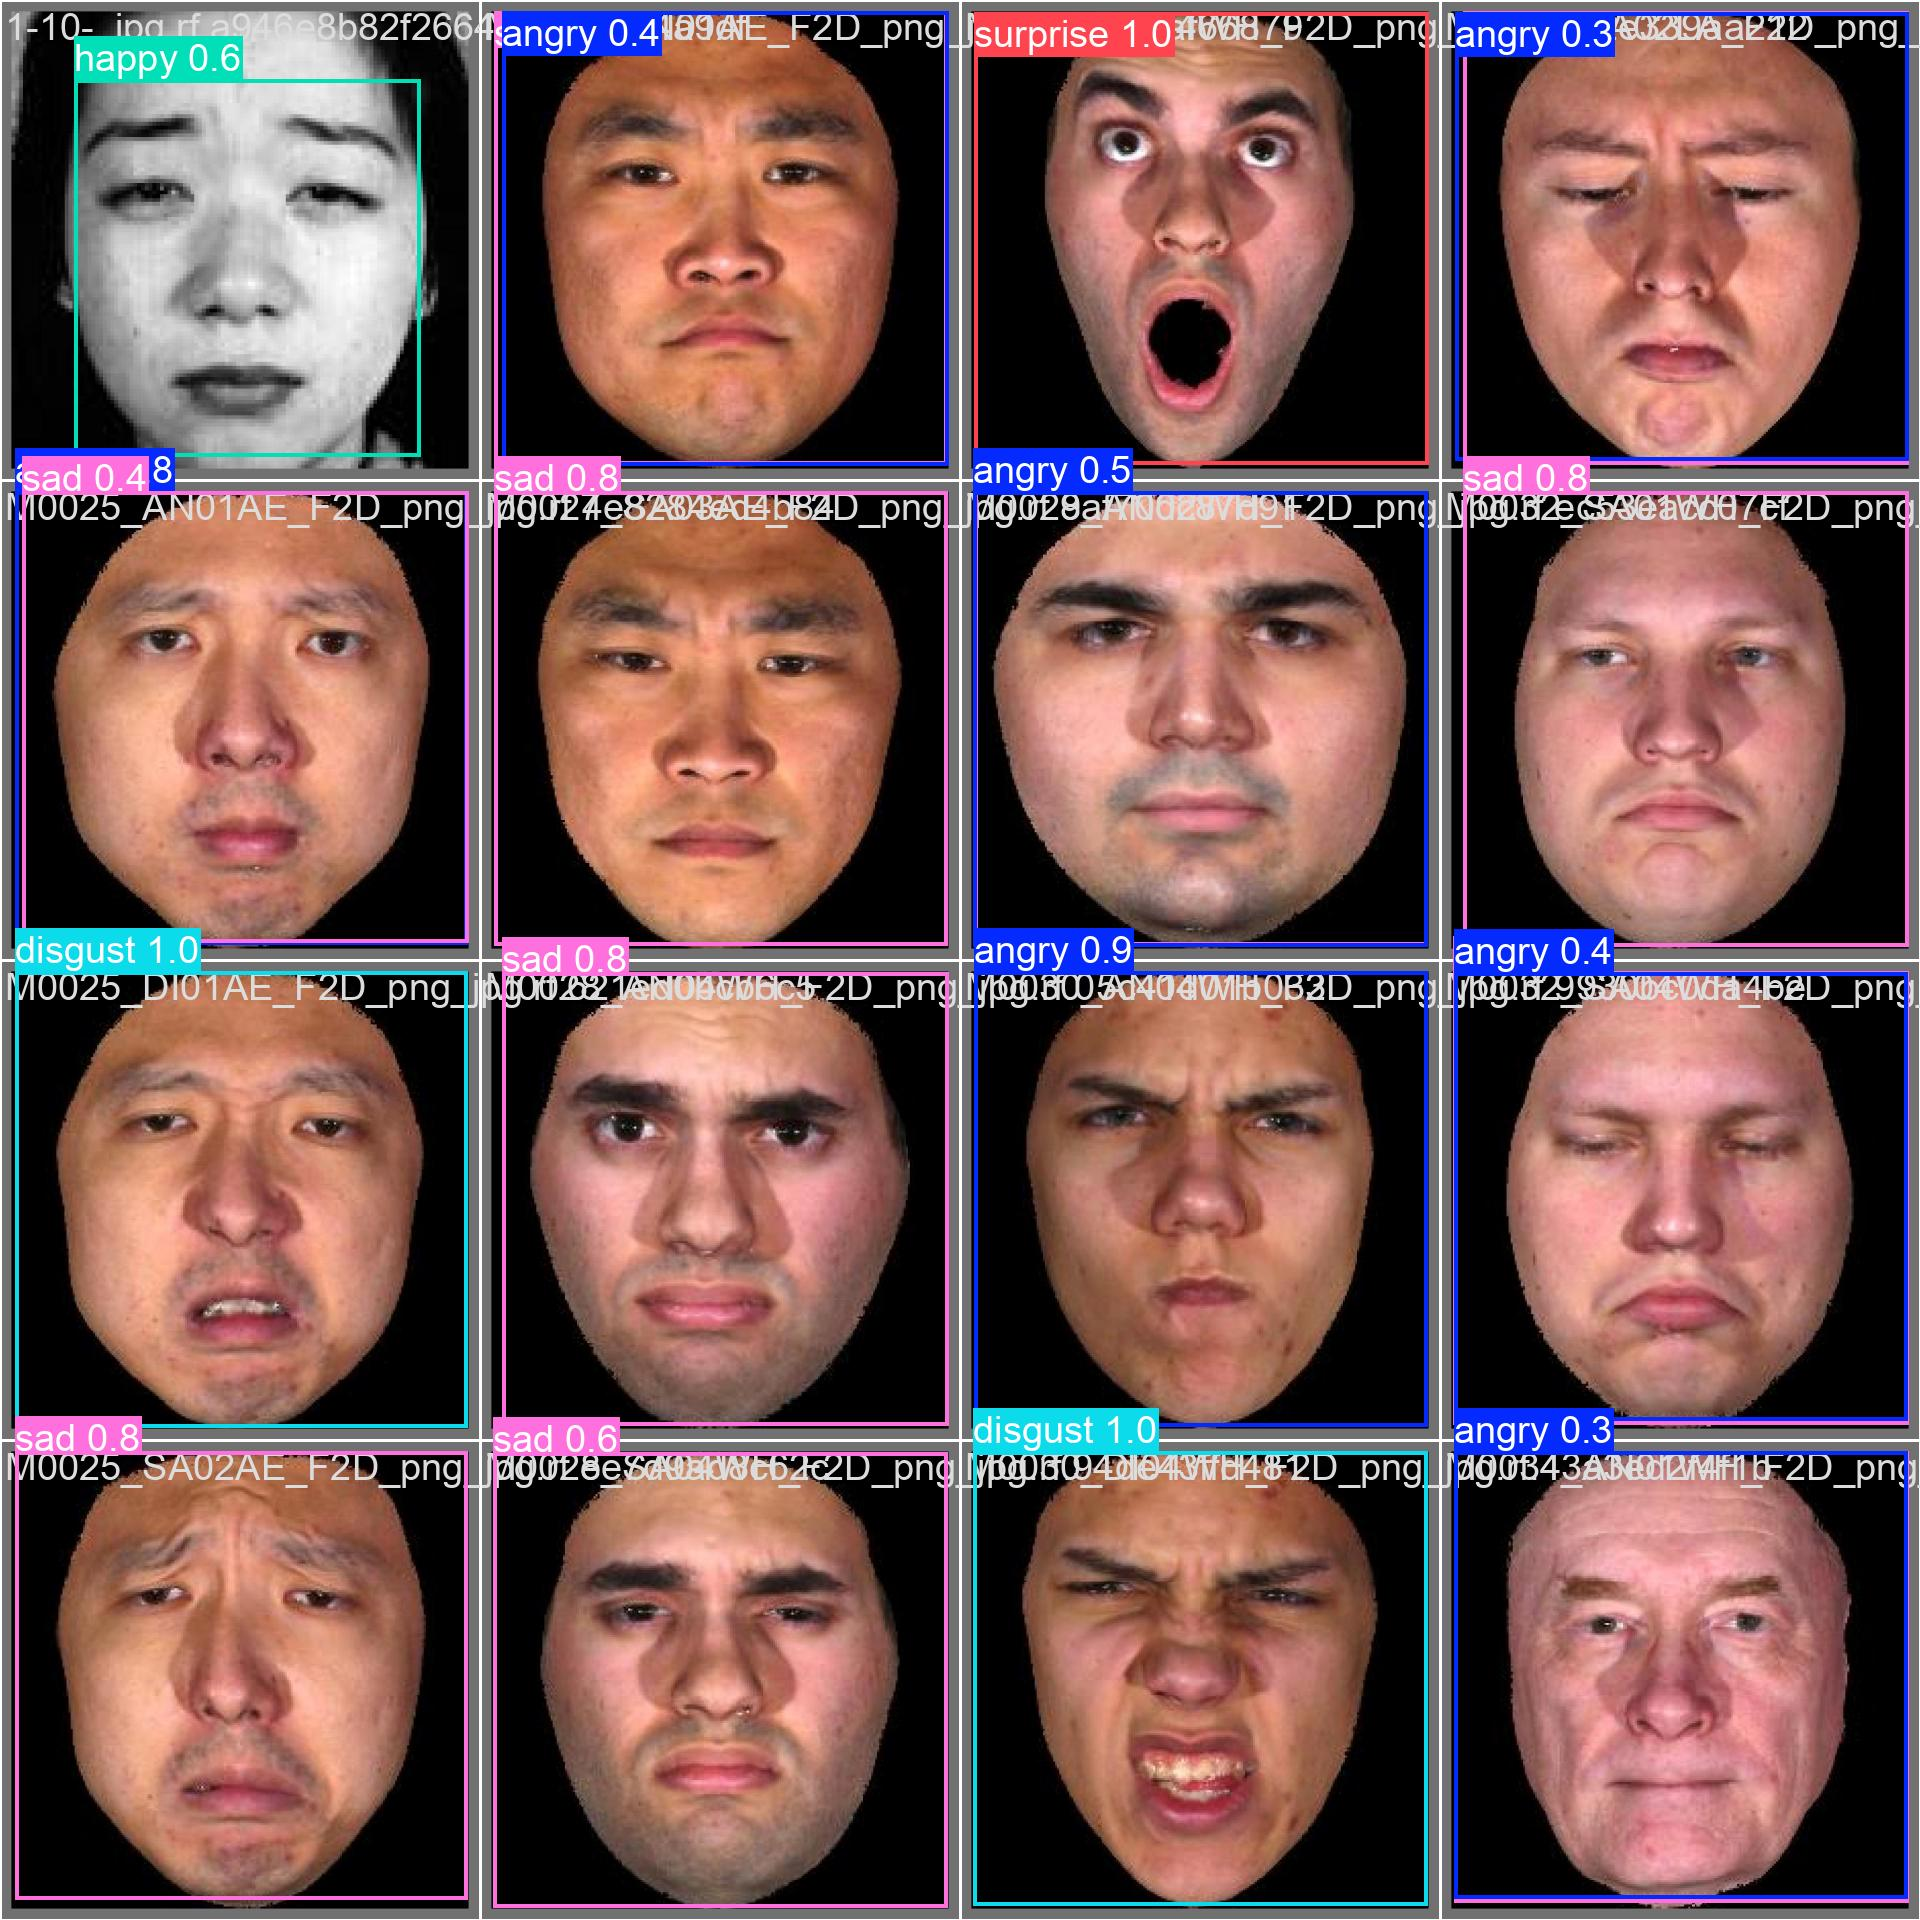

In [10]:
Image("./runs/detect/exp_name/val_batch0_pred.jpg", width=600)

**Step # 05  Validate Fine-Tuned Model**

In [11]:
# Perform validation
results = model.val(
    data=f"{dataset.location}/data.yaml",  # Path to the dataset YAML file
    batch=8,                  # Batch size for validation
    imgsz=640,                 # Image size for validation
    conf=0.001,                # Confidence threshold for predictions
    iou=0.6,                   # IoU threshold for NMS
    device=0,                  # Specify GPU (0) or CPU ('cpu')
    split="val"                # Split to validate on (default: 'val')
)



Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:01<00:00, 16.82it/s]


                   all        185        862      0.652      0.725      0.736      0.622
                 angry         76        176      0.534      0.585      0.612      0.456
               disgust         18         18       0.72      0.944      0.907      0.894
                  fear         51        128       0.67      0.618       0.68      0.533
                 happy         64        180      0.722      0.789      0.826      0.625
               neutral         52        184      0.501      0.696      0.601      0.454
                   sad         64        144      0.497      0.535      0.567      0.456
              surprise         32         32      0.918      0.906      0.958      0.939
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/exp_name2


**Step # 06 Inference with Custom Model on Images**


image 1/1 /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/test/images/H286_jpg.rf.040bf248d5d5d82a4b6c9dc3b2f21119.jpg: 640x640 1 happy, 6.2ms
Speed: 0.9ms preprocess, 6.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


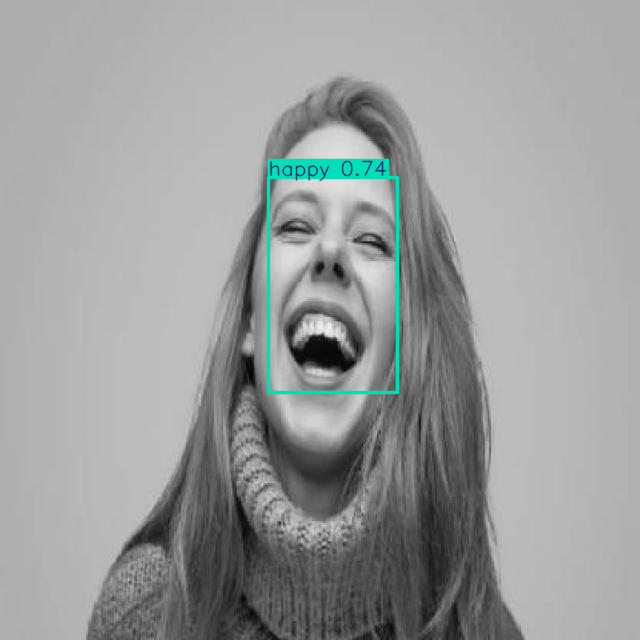


image 1/1 /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/test/images/M0027_SA04AE_F2D_png_jpg.rf.bcc33f0a287d95a5b4298c1c3b1fc411.jpg: 640x640 1 sad, 6.6ms
Speed: 0.9ms preprocess, 6.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


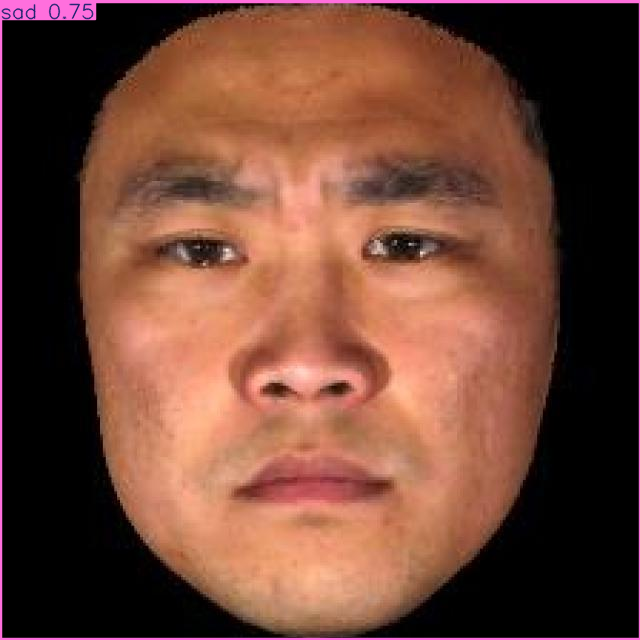


image 1/1 /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/test/images/51_jpg.rf.8c6745c7251e78a0d974f0bb5ea04267.jpg: 640x640 3 angrys, 2 fears, 3 happys, 10 neutrals, 2 sads, 7.0ms
Speed: 0.9ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


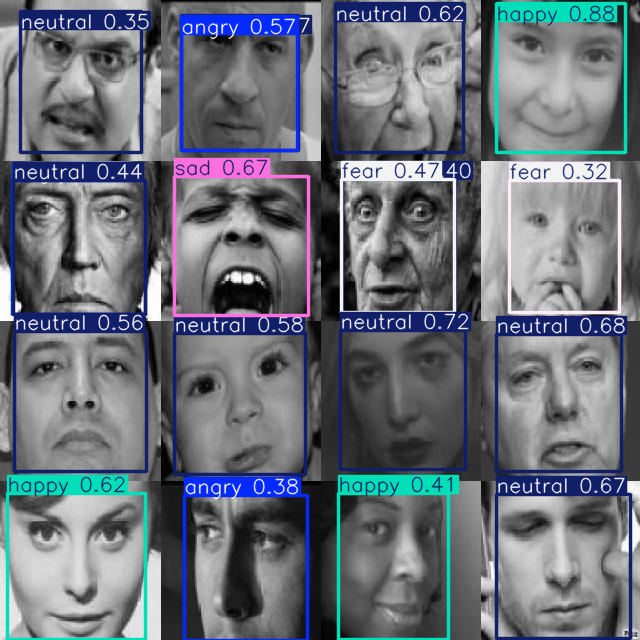


image 1/1 /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/test/images/bs103_N_N_1_png_jpg.rf.a4ed74de696b91fa1a7080d617c85209.jpg: 640x640 1 neutral, 6.2ms
Speed: 0.9ms preprocess, 6.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


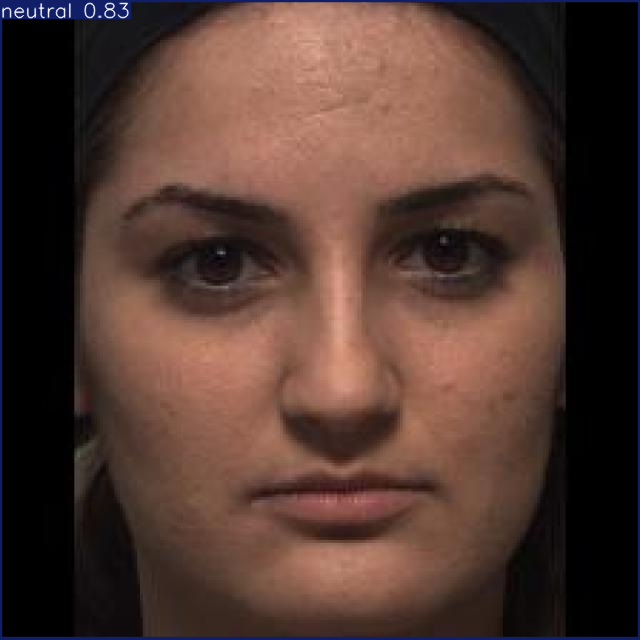


image 1/1 /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/test/images/2-7-_jpg.rf.025d777aeb48bf33ae5b840cdb33ed8d.jpg: 640x640 1 fear, 6.2ms
Speed: 0.9ms preprocess, 6.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


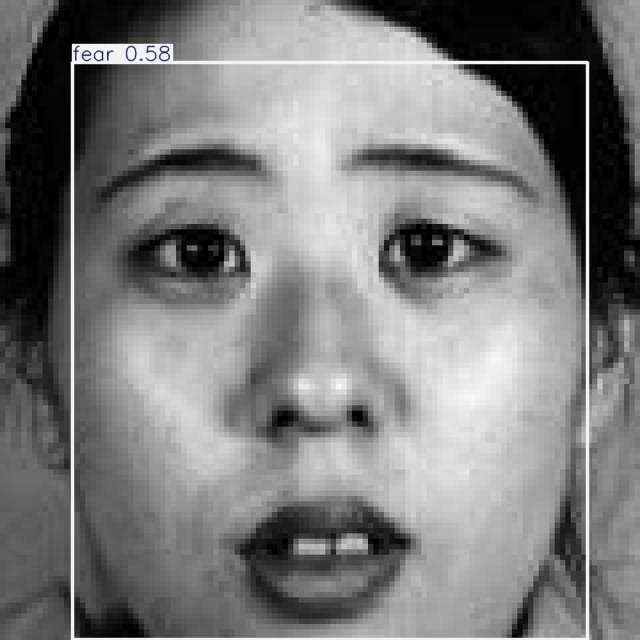


image 1/1 /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/test/images/2-3-_jpg.rf.2d5cb265aa6d734ebfffb7612bb0386c.jpg: 640x640 1 angry, 1 disgust, 6.4ms
Speed: 0.9ms preprocess, 6.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


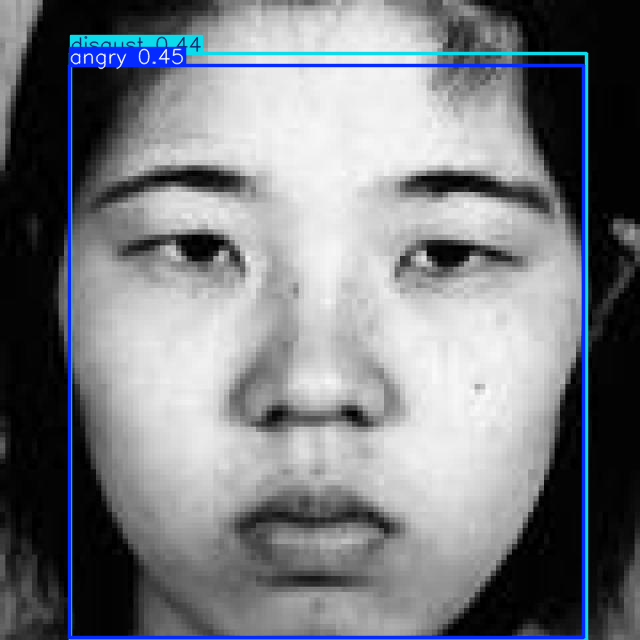


image 1/1 /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/test/images/bs031_E_DISGUST_0_png_jpg.rf.bf3ea0be4a8a716e0a0e08ff53ef12ef.jpg: 640x640 1 sad, 6.4ms
Speed: 0.8ms preprocess, 6.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


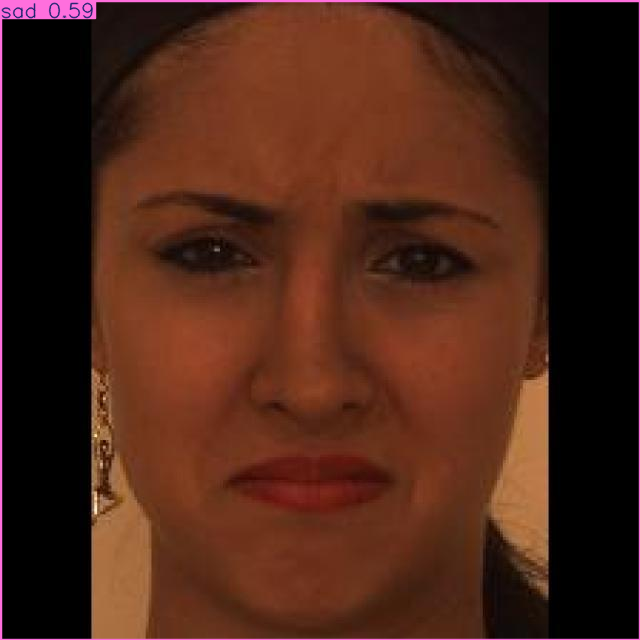


image 1/1 /workspace/DL-FOR-COMPUTER-VISION/test/yolo11/Facial-Emotion-Dataset--3/test/images/65_jpg.rf.410b304009a2e0973e223ac1d3a1a81b.jpg: 640x640 6 angrys, 5 fears, 2 happys, 2 neutrals, 3 sads, 6.1ms
Speed: 0.9ms preprocess, 6.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


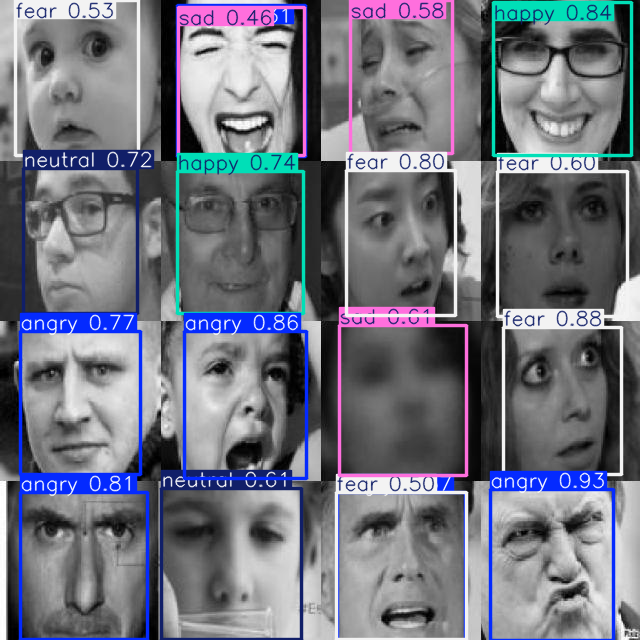

In [16]:
from ultralytics import YOLO
import random
import cv2
import os
from IPython.display import Image, display



def find_images_in_subfolders(root_dir, image_extensions=None):
    """
    Find all image files in a directory and its subfolders.
    
    Args:
        root_dir (str): The root directory to search.
        image_extensions (list, optional): List of image file extensions to look for.
                                           Defaults to common image extensions.
    
    Returns:
        list: List of paths to image files.
    """
    if image_extensions is None:
        image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']
    
    image_files = []
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_files.append(os.path.join(subdir, file))
    return image_files


# Example usage
root_directory = './Facial-Emotion-Dataset--3/test/images'  # Replace with your directory path
image_list = find_images_in_subfolders(root_directory)



# Randomly select 10 unique images
random_images = random.sample(image_list, 8)

# Process each randomly selected image
for image_path in random_images:
    results = model(image_path, imgsz=640)
    results[0].show()